# Project Title: Lending Club Case Study
# Team Members: Debasish Mondal, Sudha G. Lakshmaiah 

### Business Objective: By performing an exploratory data analysis (EDA) on the given dataset, we are going to identify the variables that indicate the possible loan defaulters.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Data Reading

In [3]:
lending = pd.read_csv("loan.csv")
warnings.filterwarnings(action = 'ignore')
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Description

In [4]:
lending.shape

(39717, 111)

In [5]:
lending.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data Cleansing: Removing 'Null' Columns

In [6]:
lending.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
lending.dropna(axis = 1, how = 'all', thresh = None, subset = None, inplace = True)

In [8]:
lending.shape

(39717, 57)

In [9]:
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Data Cleansing: Removing Single Valued Columns

In [10]:
single_column = list(lending.nunique()[lending.nunique().values == 1].index)

In [11]:
lending.drop(columns = single_column, level = None, inplace = True)

In [12]:
lending.shape

(39717, 48)

In [13]:
lending.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


## Data Cleansing: Removing Irrelevant Columns

In [14]:
lending.columns.sort

<bound method Index.sort of Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')>

### The following columns are not considered in our analysis, and the reasons are stated below.

- 'id', 'member_id', 'emp_title', 'url', 'title', 'zip_code', 'addr_state', 'desc': These variables only provide non-technical information, which is irrelevant for exploratory data analysis (EDA).

-  'issue_d', 'delinq_2yrs', 'inq_last_6mths',  'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'total_pymnt_inv', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d': These variables are indicate only some invester oriented or post loan approval features or just simply do not put any signifiacnce on the loan defaulter analysis.
   
- 'funded_amnt': As' funded_amnt_inv 'prefered over it as a more reliable measure of loan amount.

In [15]:
irr_column = ['id', 'member_id', 'funded_amnt', 'emp_title', 'issue_d', 'url', 'desc', 'title', 'zip_code',
             'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 
              'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
              'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
               'total_pymnt_inv', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 
              'last_credit_pull_d']

In [16]:
lending.drop(columns = list(irr_column), level = None, inplace = True)

In [17]:
lending.shape

(39717, 19)

In [18]:
lending.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,17.94,15,0,53.90%,38,0.0


## Data Cleaning: Standardization of Data Formats

In [19]:
lending.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
lending.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
lending['term'] = lending['term'].apply(lambda x: int(x.replace('months','')))

In [22]:
lending['int_rate'] = lending['int_rate'].apply(lambda x: float(x.replace('%','')))

In [23]:
lending['revol_util'] = pd.Series(lending['revol_util']).str.replace('%','').astype(float)

In [24]:
lending.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,3,0,83.7,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,3,0,9.4,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,0,98.5,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10,0,21.0,37,0.0
4,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,17.94,15,0,53.9,38,0.0


In [25]:
lending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  int64  
 3   int_rate              39717 non-null  float64
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  open_acc              39717 non-null  int64  
 15  pub_rec            

In [26]:
lending['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [27]:
lending['pub_rec_bankruptcies'] = lending['pub_rec_bankruptcies'].fillna(0)
lending['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [28]:
lending['revol_util'] = lending['revol_util'].fillna(0)

In [29]:
lending['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [30]:
lending['emp_length'] = lending['emp_length'].str.replace('years','')
lending['emp_length'] = lending['emp_length'].str.replace('year','')
lending['emp_length'] = lending['emp_length'].str.replace('+','')
lending['emp_length'] = lending['emp_length'].str.replace('< 1','0')
lending['emp_length'] = lending['emp_length'].fillna(0)
lending['emp_length'] = lending['emp_length'].apply(lambda x: int(x))

In [31]:
lending['emp_length'].dtypes

dtype('int64')

In [32]:
lending['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [33]:
lending['home_ownership'] = lending['home_ownership'].str.replace('NONE','OTHER')
lending['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [34]:
lending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  int64  
 3   int_rate              39717 non-null  float64
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            39717 non-null  int64  
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  open_acc              39717 non-null  int64  
 15  pub_rec            

In [35]:
lending.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,3,0,83.7,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,3,0,9.4,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,0,98.5,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10,0,21.0,37,0.0
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Current,other,17.94,15,0,53.9,38,0.0


## Data Cleansing: Outlier Treatment

In [36]:
lending.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

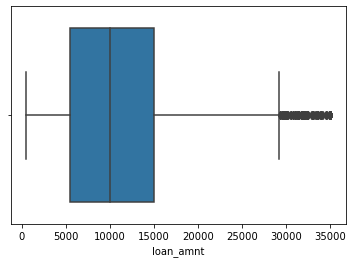

In [37]:
sns.boxplot(lending['loan_amnt'])
plt.show()

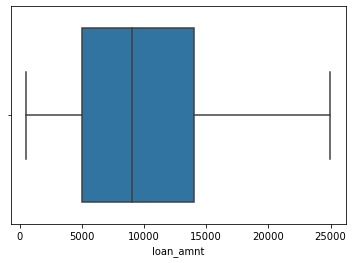

In [38]:
lending['loan_amnt'] = lending['loan_amnt'][lending['loan_amnt'] < lending['loan_amnt'].quantile(0.95)]
sns.boxplot(lending['loan_amnt'])
plt.show()

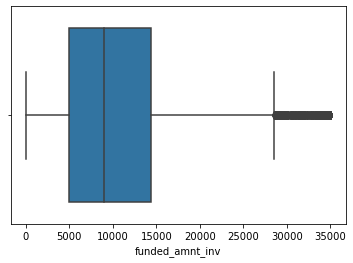

In [39]:
sns.boxplot(lending['funded_amnt_inv'])
plt.show()

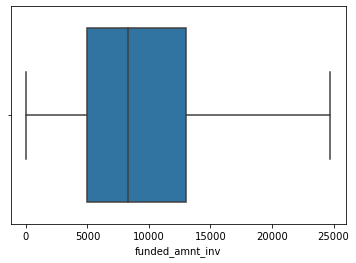

In [40]:
lending['funded_amnt_inv'] = lending['funded_amnt_inv'][lending['funded_amnt_inv'] < lending['funded_amnt_inv'].quantile(0.95)]
sns.boxplot(lending['funded_amnt_inv'])
plt.show()

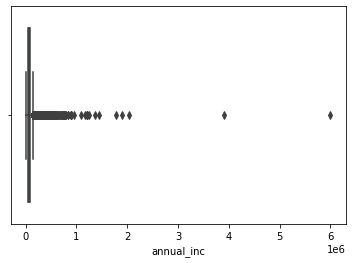

In [41]:
sns.boxplot(lending['annual_inc'])
plt.show()

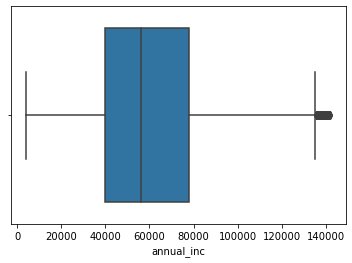

In [42]:
lending['annual_inc'] = lending['annual_inc'][lending['annual_inc'] < lending['annual_inc'].quantile(0.95)]
sns.boxplot(lending['annual_inc'])
plt.show()

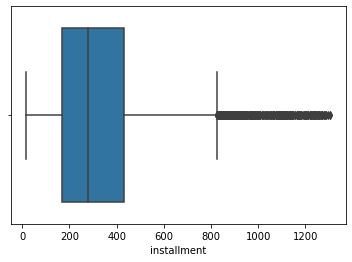

In [43]:
sns.boxplot(lending['installment'])
plt.show()

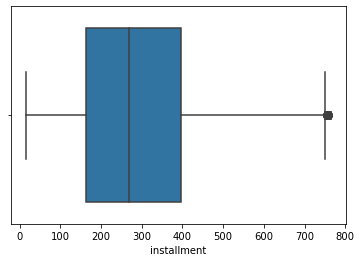

In [44]:
lending['installment'] = lending['installment'][lending['installment'] < lending['installment'].quantile(0.95)]
sns.boxplot(lending['installment'])
plt.show()

In [45]:
lending.shape

(39717, 19)

## Data Extraction: Extraction of Requisite Data
### We do not place much weight on those customers in the loan defaulter analysis whose loan status is marked as "Charged Off" due to on-time payments of their loan instalments. As a result, we exclude them from the provided dataset.

In [46]:
lending['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [47]:
lending = lending[~(lending['loan_status'] == 'Current')] 
lending['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [48]:
lending.shape

(38577, 19)

## Exploratory Data Analysis: Univariate and Segmented Univariate Analysis

In [49]:
lending.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,3,0,83.7,9,0.0
1,2500.0,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,3,0,9.4,4,0.0
2,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,0,98.5,10,0.0
3,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10,0,21.0,37,0.0
5,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,9,0,28.3,12,0.0


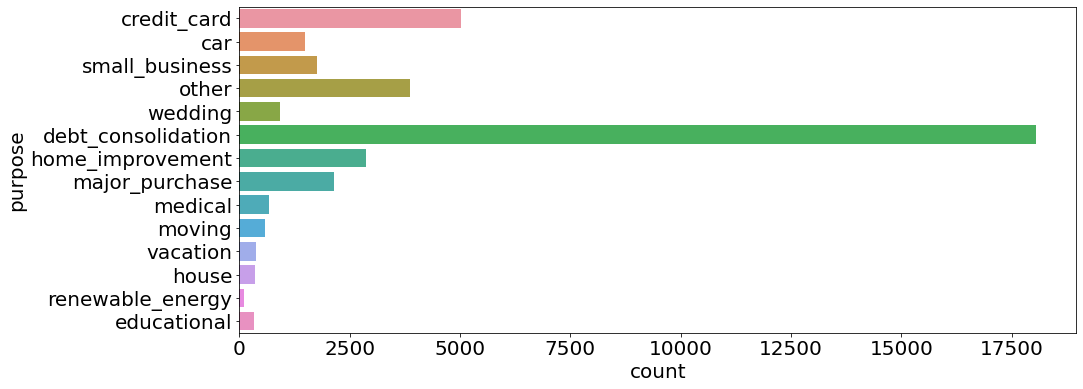

In [50]:
plt.figure(figsize = (15,6))
ax1 = sns.countplot(y = lending['purpose'])
ax1.set_xlabel('count', fontsize = 20)
ax1.set_ylabel('purpose', fontsize = 20)
ax1.tick_params(labelsize = 20)
plt.show()

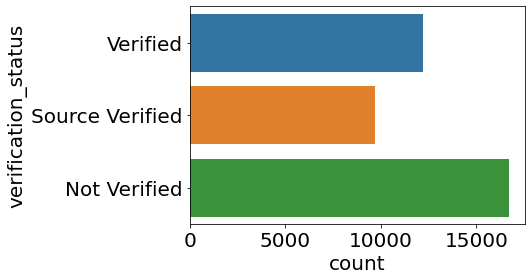

In [51]:
ax2 = sns.countplot(y = lending['verification_status'])
ax2.set_xlabel('count', fontsize = 20)
ax2.set_ylabel('verification_status', fontsize = 20)
ax2.tick_params(labelsize = 20)
plt.show()

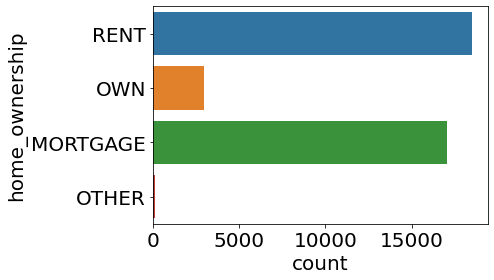

In [52]:
ax3 = sns.countplot(y = lending['home_ownership'])
ax3.set_xlabel('count', fontsize = 20)
ax3.set_ylabel('home_ownership', fontsize = 20)
ax3.tick_params(labelsize = 20)
plt.show()

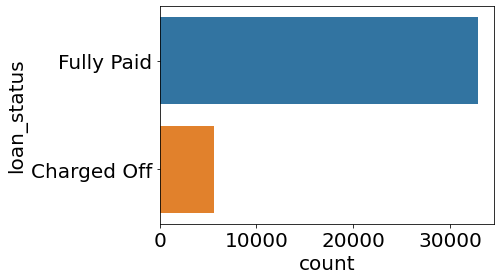

In [53]:
ax4 = sns.countplot(y = lending['loan_status'])
ax4.set_xlabel('count', fontsize = 20)
ax4.set_ylabel('loan_status', fontsize = 20)
ax4.tick_params(labelsize = 20)
plt.show() 

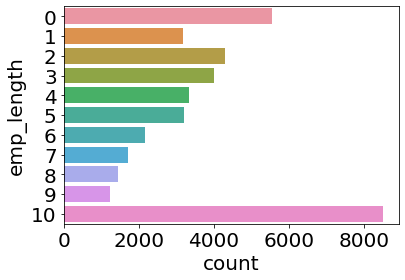

In [54]:
ax5 = sns.countplot(y = lending['emp_length'])
ax5.set_xlabel('count', fontsize = 20)
ax5.set_ylabel('emp_length', fontsize = 20)
ax5.tick_params(labelsize = 20)
plt.show() 

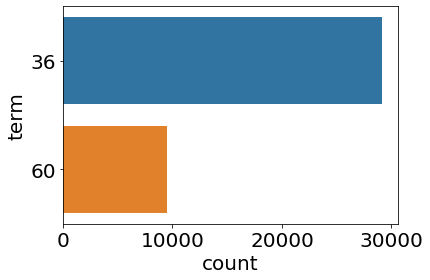

In [55]:
ax6 = sns.countplot(y = lending['term'])
ax6.set_xlabel('count', fontsize = 20)
ax6.set_ylabel('term', fontsize = 20)
ax6.tick_params(labelsize = 20)
plt.show()

### <u>Observation </u>
- The vast majority of people use the loan for debt consolidation purposes.
- The majority of people's incomes have not been verified by LC.
- Most people have either a rented or mortgaged home.
- The proportion of people who fully repay their loans is quite high.
- The loan has mostly been taken out by people who have worked for at least ten years.
- The majority of people prefer to repay their loans in 36 month installments.

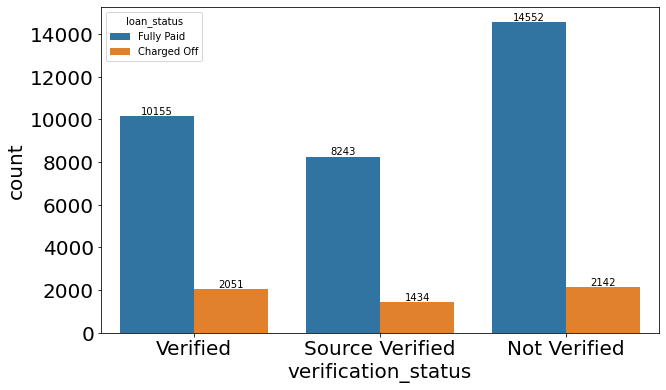

In [56]:
plt.figure(figsize = (10,6))
ax7 = sns.countplot(x = 'verification_status', hue = 'loan_status', data = lending)
ax7.set_xlabel('verification_status', fontsize = 20)
ax7.set_ylabel('count', fontsize = 20)
ax7.tick_params(labelsize = 20)
ax7.bar_label(ax7.containers[0])
ax7.bar_label(ax7.containers[1])
plt.show()

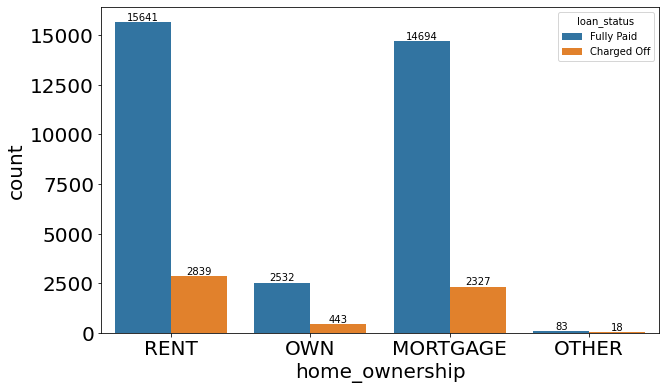

In [57]:
plt.figure(figsize = (10,6))
ax8 = sns.countplot(x = 'home_ownership', hue = 'loan_status', data = lending)
ax8.set_xlabel('home_ownership', fontsize = 20)
ax8.set_ylabel('count', fontsize = 20)
ax8.tick_params(labelsize = 20)
ax8.bar_label(ax8.containers[0])
ax8.bar_label(ax8.containers[1])
plt.show()

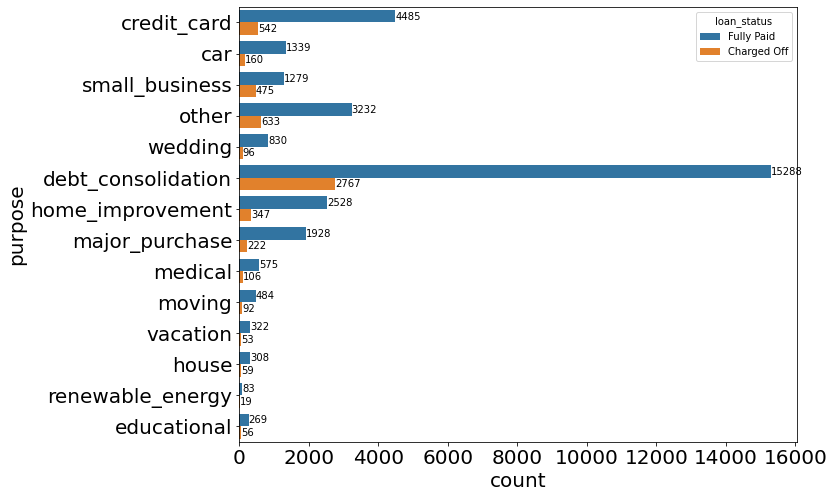

In [58]:
plt.figure(figsize = (10,8))
ax9 = sns.countplot(y = 'purpose', hue = 'loan_status', data = lending)
ax9.set_xlabel('count', fontsize = 20)
ax9.set_ylabel('purpose', fontsize = 20)
ax9.tick_params(labelsize = 20)
ax9.bar_label(ax9.containers[0])
ax9.bar_label(ax9.containers[1])
plt.show()

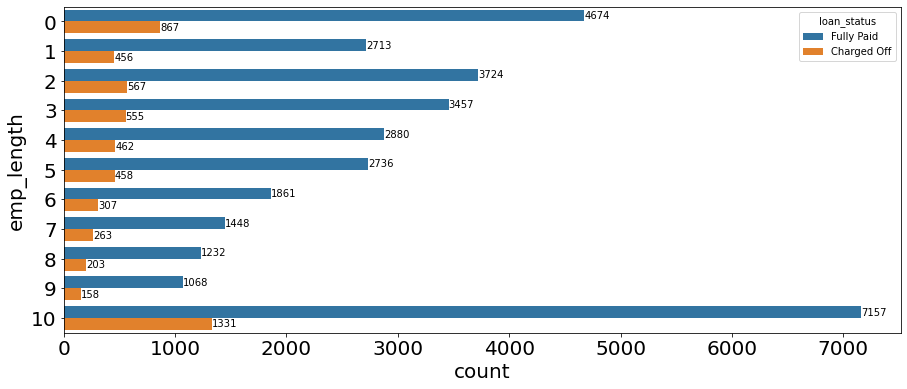

In [59]:
plt.figure(figsize = (15,6))
ax10 = sns.countplot(y = 'emp_length', hue = 'loan_status', data = lending)
ax10.set_xlabel('count', fontsize = 20)
ax10.set_ylabel('emp_length', fontsize = 20)
ax10.tick_params(labelsize = 20)
ax10.bar_label(ax10.containers[0])
ax10.bar_label(ax10.containers[1])
plt.show()

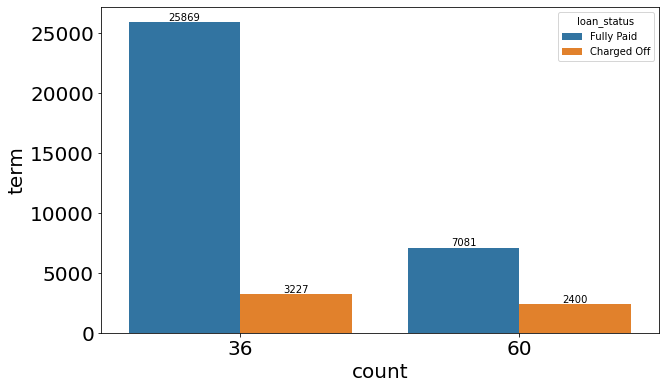

In [60]:
plt.figure(figsize = (10,6))
ax11 = sns.countplot(x = 'term', hue = 'loan_status', data = lending)
ax11.set_xlabel('count', fontsize = 20)
ax11.set_ylabel('term', fontsize = 20)
ax11.tick_params(labelsize = 20)
ax11.bar_label(ax11.containers[0])
ax11.bar_label(ax11.containers[1])
plt.show()

#### Extract from the 'sub_grade' column.

In [61]:
lending['sub_grade'] = lending['sub_grade'].apply(lambda x: int(x[1]))

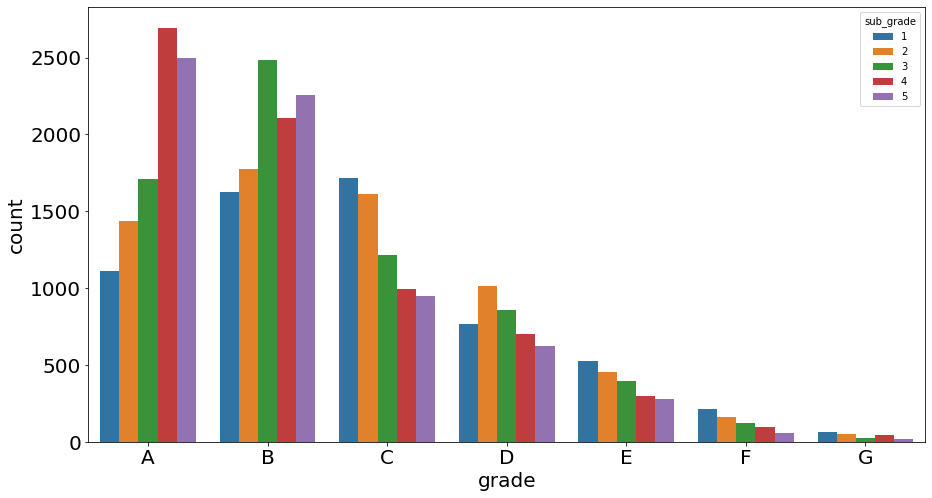

In [62]:
plt.figure(figsize = (15,8))
ax12 = sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade', 
                     data = lending[lending['loan_status'] == 'Fully Paid'])
ax12.set_xlabel('grade', fontsize = 20)
ax12.set_ylabel('count', fontsize = 20)
ax12.tick_params(labelsize = 20)
plt.show()

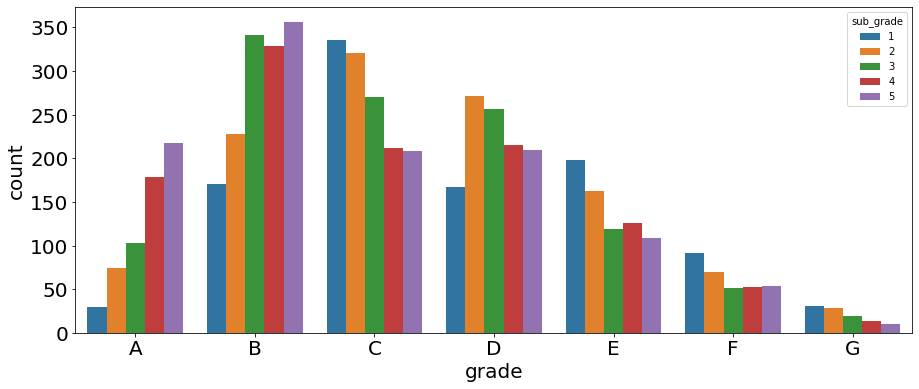

In [63]:
plt.figure(figsize = (15,6))
ax13 = sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade', 
                     data = lending[lending['loan_status'] == 'Charged Off'])
ax13.set_xlabel('grade', fontsize = 20)
ax13.set_ylabel('count', fontsize = 20)
ax13.tick_params(labelsize = 20)
plt.show()

In [64]:
lending['loan_amnt_bin'] = pd.cut(lending['loan_amnt'], bins = 10, precision = 0)

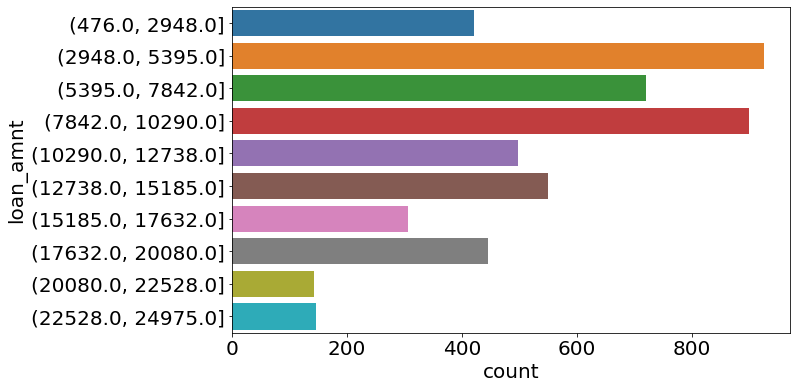

In [65]:
plt.figure(figsize = (10,6))
ax14 = sns.countplot(y = 'loan_amnt_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax14.set_xlabel('count', fontsize = 20)
ax14.set_ylabel('loan_amnt', fontsize = 20)
ax14.tick_params(labelsize = 20)
plt.show()

In [66]:
lending['funded_amnt_inv_bin'] = pd.cut(lending['funded_amnt_inv'], bins = 10, precision = 0)

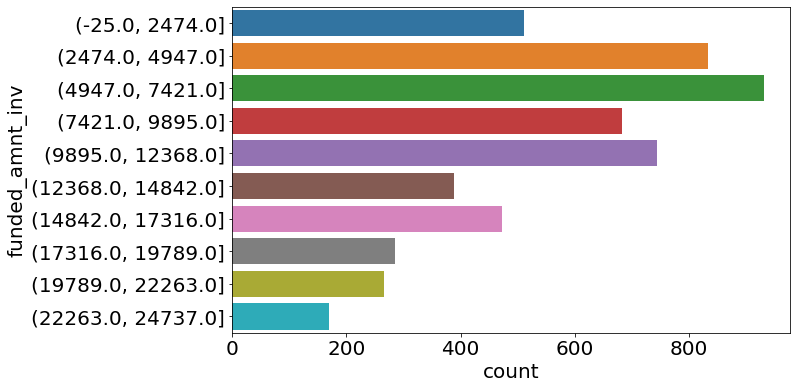

In [67]:
plt.figure(figsize = (10,6))
ax15 = sns.countplot(y = 'funded_amnt_inv_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax15.set_xlabel('count', fontsize = 20)
ax15.set_ylabel('funded_amnt_inv', fontsize = 20)
ax15.tick_params(labelsize = 20)
plt.show()

In [68]:
lending['int_rate_bin'] = pd.cut(lending['int_rate'], bins = 10, precision = 0)

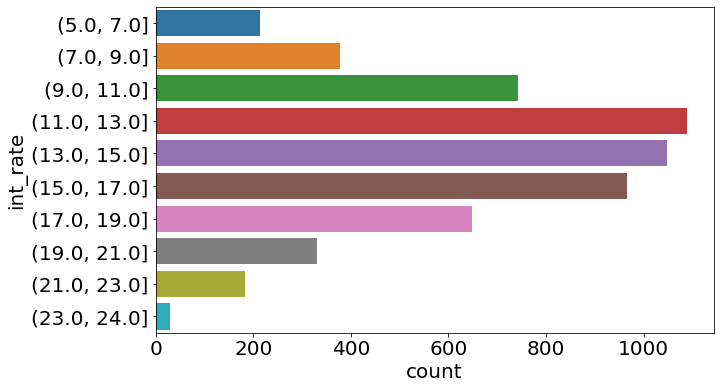

In [69]:
plt.figure(figsize = (10,6))
ax16 = sns.countplot(y = 'int_rate_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax16.set_xlabel('count', fontsize = 20)
ax16.set_ylabel('int_rate', fontsize = 20)
ax16.tick_params(labelsize = 20)
plt.show()

In [70]:
lending['installment_bin'] = pd.cut(lending['installment'], bins = 10, precision = 0)

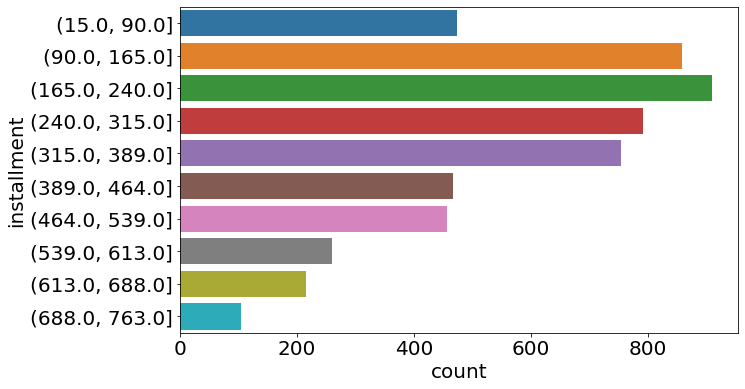

In [71]:
plt.figure(figsize = (10,6))
ax17 = sns.countplot(y = 'installment_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax17.set_xlabel('count', fontsize = 20)
ax17.set_ylabel('installment', fontsize = 20)
ax17.tick_params(labelsize = 20)
plt.show()

In [72]:
lending['annual_inc_bin'] = pd.cut(lending['annual_inc'], bins = 10, precision = 0)

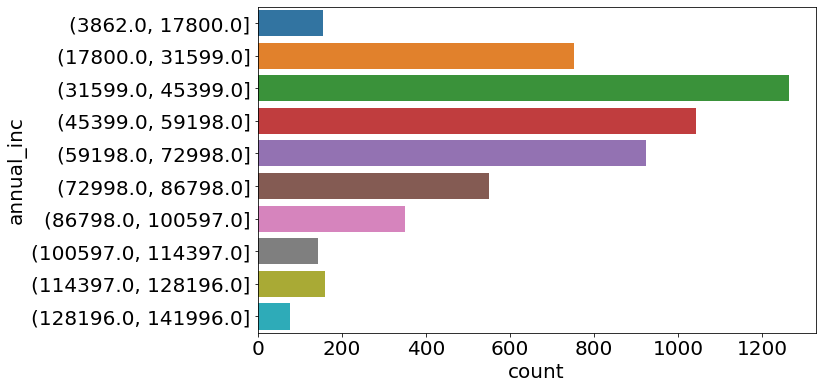

In [73]:
plt.figure(figsize = (10,6))
ax18 = sns.countplot(y = 'annual_inc_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax18.set_xlabel('count', fontsize = 20)
ax18.set_ylabel('annual_inc', fontsize = 20)
ax18.tick_params(labelsize = 20)
plt.show()

In [74]:
lending['dti_bin'] = pd.cut(lending['dti'], bins = 10, precision = 0)

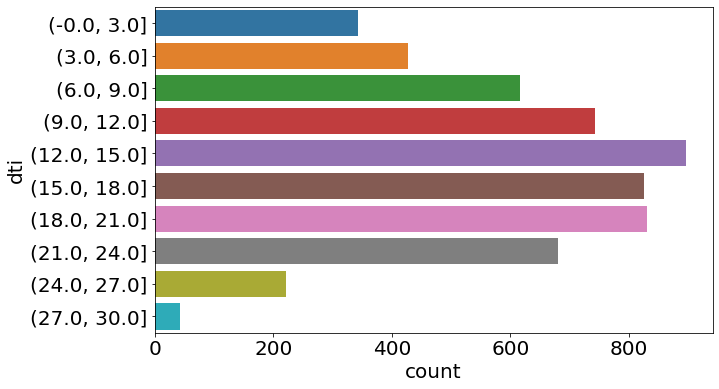

In [75]:
plt.figure(figsize = (10,6))
ax19 = sns.countplot(y = 'dti_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax19.set_xlabel('count', fontsize = 20)
ax19.set_ylabel('dti', fontsize = 20)
ax19.tick_params(labelsize = 20)
plt.show()

In [76]:
lending['emp_length_bin'] = pd.cut(lending['emp_length'], bins = 5, precision = 0)

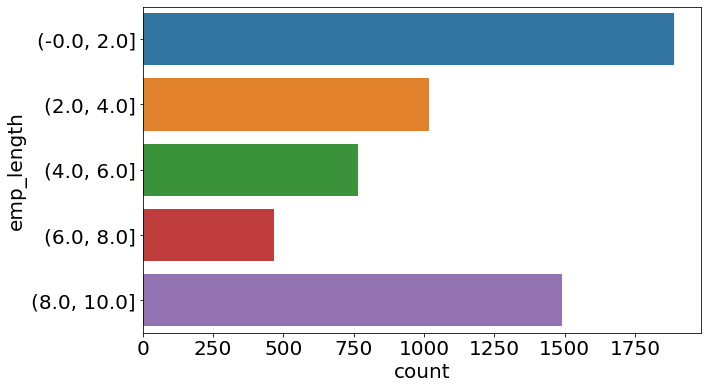

In [77]:
plt.figure(figsize = (10,6))
ax21 = sns.countplot(y = 'emp_length_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax21.set_xlabel('count', fontsize = 20)
ax21.set_ylabel('emp_length', fontsize = 20)
ax21.tick_params(labelsize = 20)
plt.show()

In [78]:
lending['open_acc_bin'] = pd.cut(lending['open_acc'], bins = 5, precision = 0)

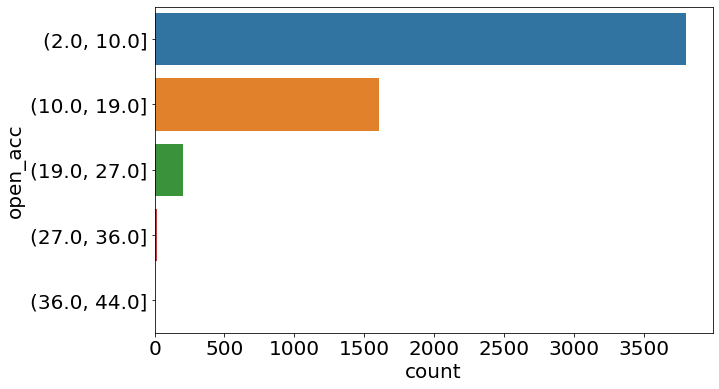

In [79]:
plt.figure(figsize = (10,6))
ax22 = sns.countplot(y = 'open_acc_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax22.set_xlabel('count', fontsize = 20)
ax22.set_ylabel('open_acc', fontsize = 20)
ax22.tick_params(labelsize = 20)
plt.show()

In [80]:
lending['pub_rec_bin'] = pd.cut(lending['pub_rec'], bins = 5, precision = 0)

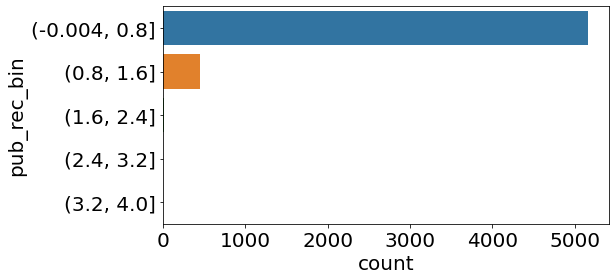

In [81]:
plt.figure(figsize = (8,4))
ax23 = sns.countplot(y = 'pub_rec_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax23.set_xlabel('count', fontsize = 20)
ax23.set_ylabel('pub_rec_bin', fontsize = 20)
ax23.tick_params(labelsize = 20)
plt.show()

In [82]:
lending['revol_util_bin'] = pd.cut(lending['revol_util'], bins = 5, precision = 0)

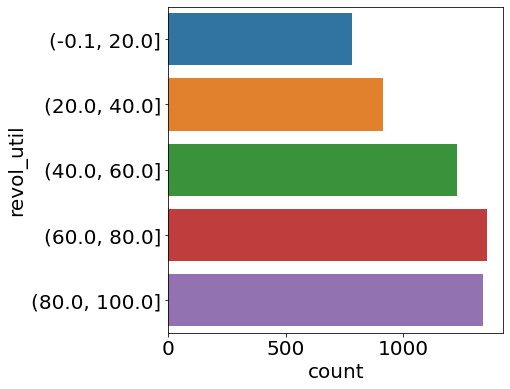

In [83]:
plt.figure(figsize = (6,6))
ax24 = sns.countplot(y = 'revol_util_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax24.set_xlabel('count', fontsize = 20)
ax24.set_ylabel('revol_util', fontsize = 20)
ax24.tick_params(labelsize = 20)
plt.show()

In [84]:
lending['total_acc_bin'] = pd.cut(lending['total_acc'], bins = 10, precision = 0)

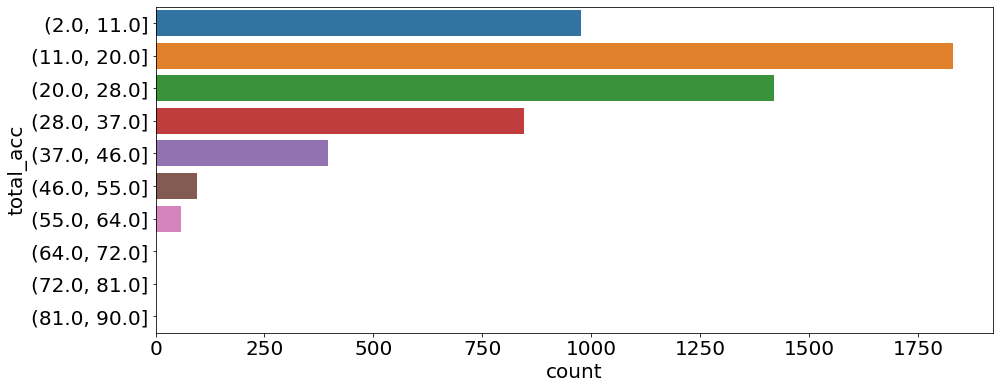

In [85]:
plt.figure(figsize = (15,6))
ax25 = sns.countplot(y = 'total_acc_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax25.set_xlabel('count', fontsize = 20)
ax25.set_ylabel('total_acc', fontsize = 20)
ax25.tick_params(labelsize = 20)
plt.show()

In [86]:
lending['pub_rec_bankruptcies_bin'] = pd.cut(lending['pub_rec_bankruptcies'], bins = 5, precision = 0)

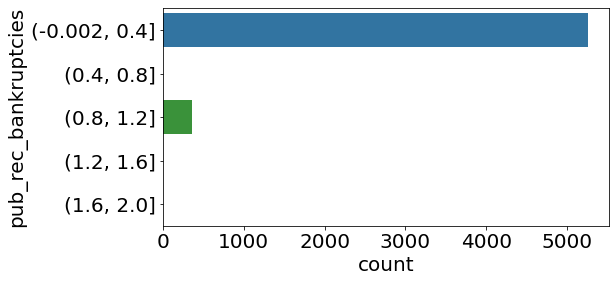

In [87]:
plt.figure(figsize = (8,4))
ax26 = sns.countplot(y = 'pub_rec_bankruptcies_bin', data = lending[lending['loan_status'] == 'Charged Off'])
ax26.set_xlabel('count', fontsize = 20)
ax26.set_ylabel('pub_rec_bankruptcies', fontsize = 20)
ax26.tick_params(labelsize = 20)
plt.show()

### <u>Observation </u>
### The most possible loan defaulters are -
- The customers whose income source has not been verified by LC.
- The customers who have rented home.
- The customers who have taken loans for debt consolidation.
- The customers who have been labelled as B5 in terms of loan grade.

- Customers whose loan amount is between 2948 and 5395 INR.
- Customers whose invested fund amount is between 4947 and 7421 INR.
- Customers with an interest rate of between 11 and 13.
- Customers whose installment amount is between 165 and 240 INR.
- Customers with an annual income between 31599 and 45399 INR.
- Customers with DTIs ranging from 12 to 15.
- Customers with an employment duration of 0 to 2 years.
- The customers whose number of open credit lines in the borrower's credit file is within 2 to 10.
- Customers who have one derogatory public record.
- Customers with a revolving line utilization rate of 60 to 80 percent.
- The customers whose total number of credit lines currently in the borrower's credit file is between 11 and 20.

## Exploratory Data Analysis: Bivariate Analysis

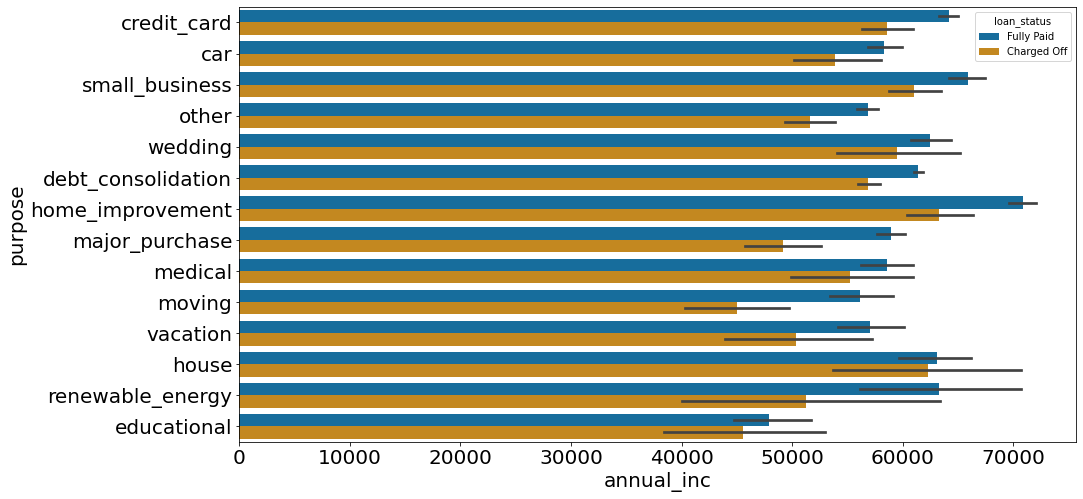

In [88]:
plt.figure(figsize = (15,8))
ax27 = sns.barplot(data = lending, x = 'annual_inc', y = 'purpose', hue = 'loan_status', palette = 'colorblind')
ax27.set_xlabel('annual_inc', fontsize = 20)
ax27.set_ylabel('purpose', fontsize = 20)
ax27.tick_params(labelsize = 20)
plt.show()

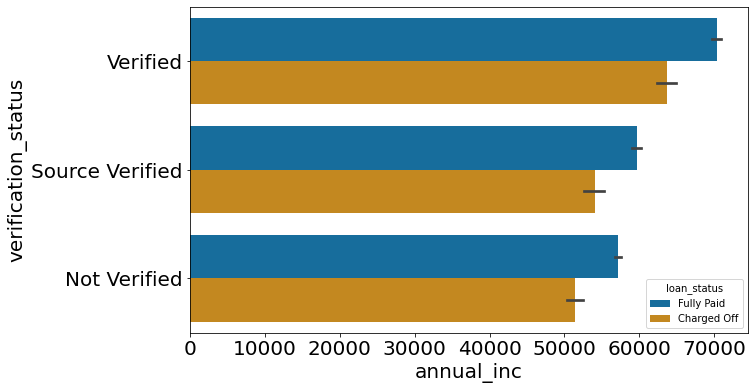

In [89]:
plt.figure(figsize = (10,6))
ax28 = sns.barplot(data = lending, x = 'annual_inc', y = 'verification_status', hue = 'loan_status', palette = 'colorblind')
ax28.set_xlabel('annual_inc', fontsize = 20)
ax28.set_ylabel('verification_status', fontsize = 20)
ax28.tick_params(labelsize = 20)
plt.show()

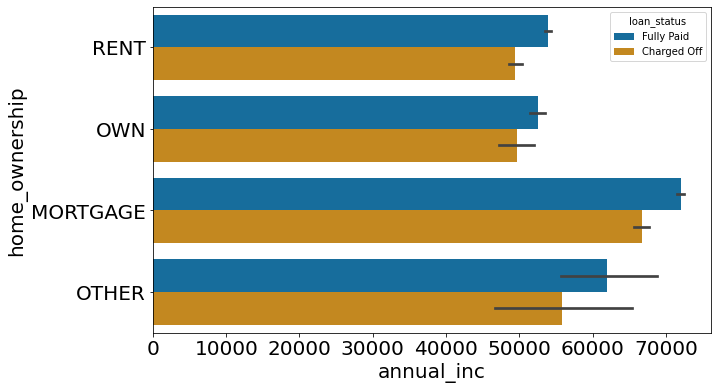

In [90]:
plt.figure(figsize = (10,6))
ax29 = sns.barplot(data = lending, x = 'annual_inc', y = 'home_ownership', hue = 'loan_status', palette = 'colorblind')
ax29.set_xlabel('annual_inc', fontsize = 20)
ax29.set_ylabel('home_ownership', fontsize = 20)
ax29.tick_params(labelsize = 20)
plt.show()

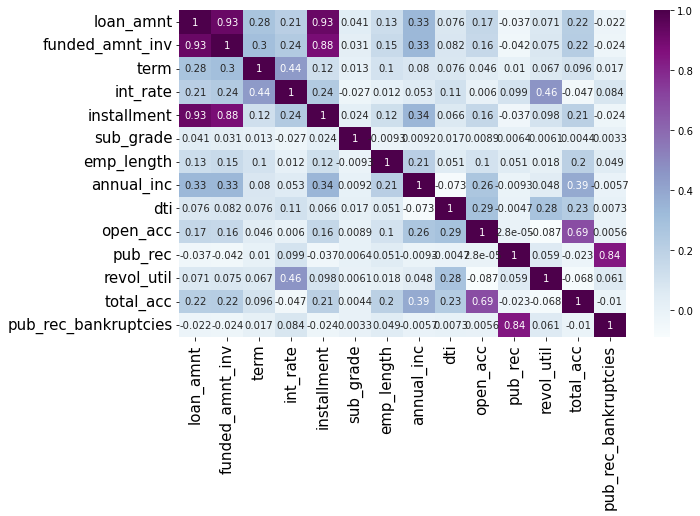

In [91]:
plt.figure(figsize = (10,6))
ax30 = sns.heatmap(lending.corr(), cmap = 'BuPu', annot = True)
ax30.tick_params(labelsize = 15)
plt.show()

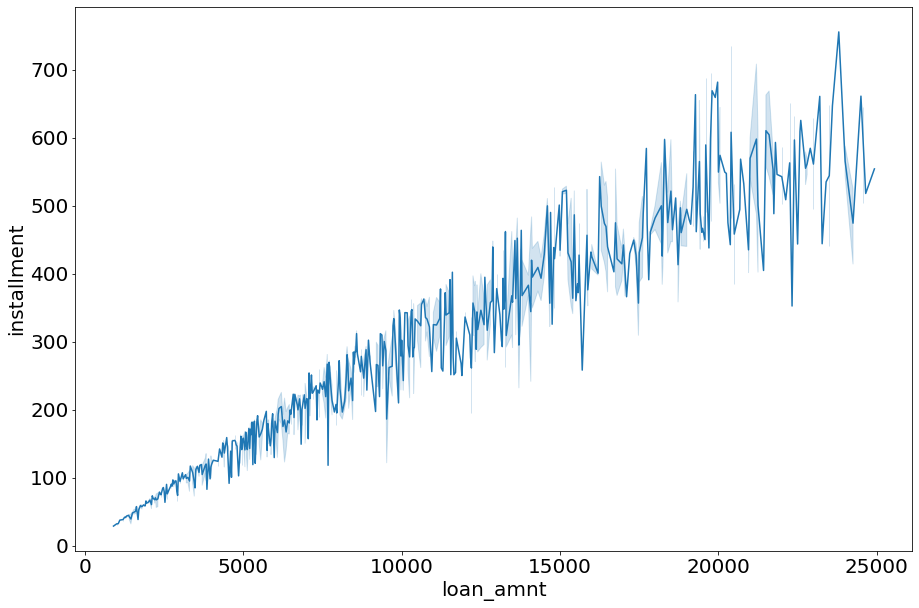

In [92]:
plt.figure(figsize = (15,10))
ax31 = sns.lineplot(x = 'loan_amnt', y = 'installment', data = lending[lending['loan_status'] == 'Charged Off'])
ax31.set_xlabel('loan_amnt', fontsize = 20)
ax31.set_ylabel('installment', fontsize = 20)
ax31.tick_params(labelsize = 20)
plt.show()

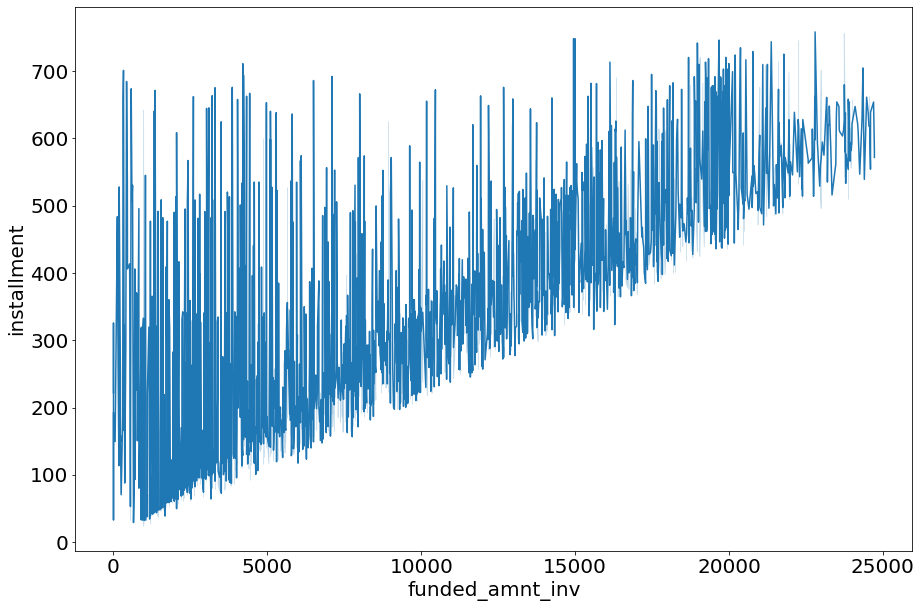

In [93]:
plt.figure(figsize = (15,10))
ax32 = sns.lineplot(x = 'funded_amnt_inv', y = 'installment', data = lending[lending['loan_status'] == 'Charged Off'])
ax32.set_xlabel('funded_amnt_inv', fontsize = 20)
ax32.set_ylabel('installment', fontsize = 20)
ax32.tick_params(labelsize = 20)
plt.show()

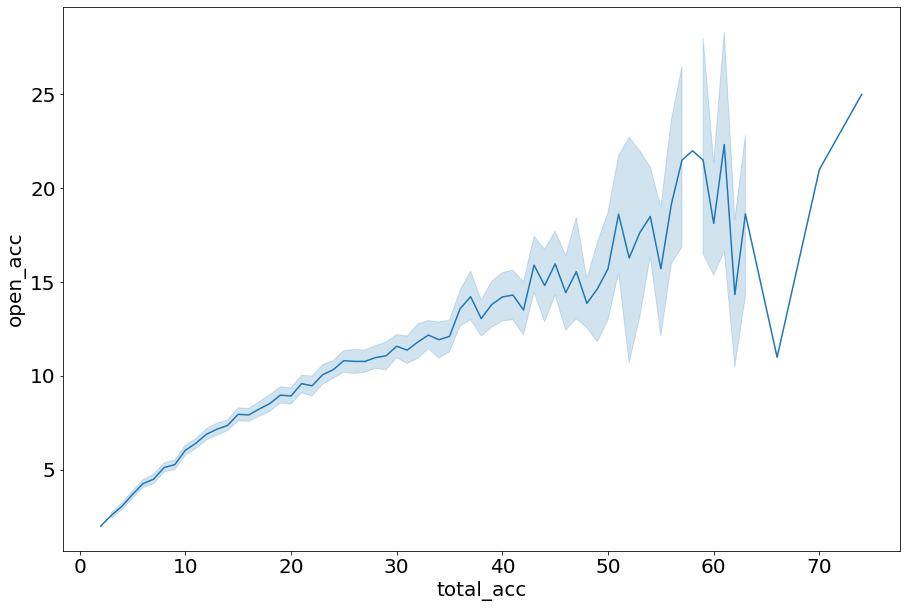

In [94]:
plt.figure(figsize = (15,10))
ax33 = sns.lineplot(x = 'total_acc', y = 'open_acc', data = lending[lending['loan_status'] == 'Charged Off'])
ax33.set_xlabel('total_acc', fontsize = 20)
ax33.set_ylabel('open_acc', fontsize = 20)
ax33.tick_params(labelsize = 20)
plt.show()

### <u>Observation </u>
### The most possible loan defaulters are -
- Customers with an annual income of more than 60,000 INR who are taking out a loan for home improvement.
- Customers who earn more than 60,000 INR per year and whose source of income has been verified by LC.
- Customers who have an annual income of more than 60,000 INR and have a mortgaged home.

### Other observations are -
- In the case of possible defaulters, the installment amount is strongly correlated with the loan amount.
- In the case of possible defaulters, the invested fund amount is strongly correlated with the loan amount.
- In the case of possible defaulters, the total number of credit lines currently in the borrower's credit file is strongly correlated with the number of open credit lines in the borrower's credit file.